In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
import seaborn as sns

In [2]:
# read data
df = pd.read_csv('monthly_data.csv', index_col='date', parse_dates=True)
# drop first row which contain metadata
df.drop(df.index[0], axis=0, inplace=True)
# convert commas to dots
df = df.apply(lambda x: x.astype(str).str.replace(',','.').astype(float))
# convert to numeric and use zeros for NaNs
df = df.fillna(0).astype(float)
# show frame
df

,fishoil_price_peru,fish_price_global,rapeseedoil_price_global,fishmeal_price_peru,peanutoil_price_global,soybeanoil_price_global,sunfloweroil_price_global,temperature_peru,precipitation_peru,fish_production_peru,fish_human_consumption_peru,fish_industrial_consumption_peru,gdp,fishmeal_price_hamburg,fishoil_export_peru,fishoil_fob_peru,fishoil_utilization_indicators,fishing_hours_peru
date,,,,,,,,,,,,,,,,,,
2022-06-01,0.0,0.0,2000.53,1608.06,2146.19,1751.76,1884.59,0.00,0.00,0.0,0.00,0.00,0.00,1741.36,0.00,0.00,0.00,0.0
2022-05-01,0.0,0.0,2218.45,1634.21,2146.29,1962.88,2079.30,0.00,0.00,5.2,30.49,1069.43,176.83,1763.18,0.00,0.00,60.67,893554.0
2022-04-01,0.0,0.0,2266.17,1643.39,2145.25,1947.51,2275.76,0.00,0.00,5.0,37.15,26.11,54.75,1740.48,0.00,0.00,1.51,919581.0
2022-03-01,0.0,0.0,2162.30,1514.62,2153.15,1956.88,2361.13,0.00,0.00,4.9,34.57,37.02,56.75,1694.78,0.00,0.00,2.09,1048627.0
2022-02-01,0.0,0.0,1744.20,1445.25,2473.10,1595.74,1499.12,0.00,0.00,4.8,32.46,41.52,70.25,1660.00,0.00,0.00,2.30,1066143.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985-05-01,315.4,0.0,0.00,0.00,0.00,0.00,0.00,18.63,96.46,0.0,0.00,0.00,0.00,0.00,2.02,0.64,0.00,0.0
1985-04-01,223.7,0.0,0.00,0.00,0.00,0.00,0.00,19.11,92.72,0.0,0.00,0.00,0.00,0.00,10.91,2.44,0.00,0.0
1985-03-01,212.9,0.0,0.00,0.00,0.00,0.00,0.00,20.35,116.60,0.0,0.00,0.00,0.00,0.00,8.63,1.84,0.00,0.0


This code can be used to choose specific rows/columns of the data to get rid of some of the metadata that is used in google sheets and to pick specific features.

In [3]:
# only use columns (x - y) as data
#df.drop(df.columns[np.r_[x, y:len(df.columns)]], axis=1, inplace=True)

# drop first x rows which contain metadata
#df.drop(df.index[0:x], axis=0, inplace=True)

This code was originally present in this file but I do not know what the intention for it was.

In [4]:
# monthly_df_ip = monthly_df.interpolate(method = 'linear', direction = 'forward')
# monthly_df.dtypes

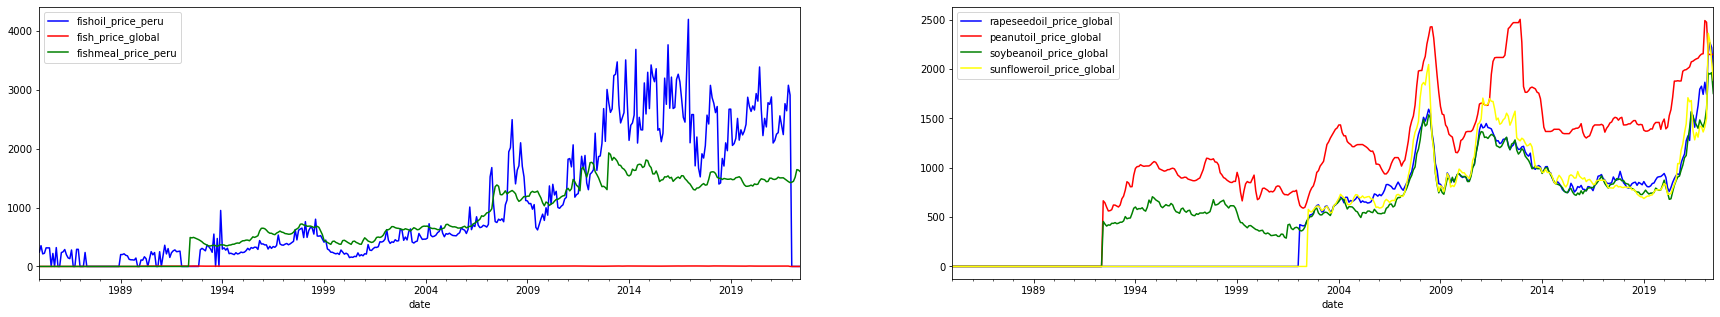

In [5]:
# plot all data
fig, axs = plt.subplots(1,2,figsize=(30, 5))

# only show data in certain interval
date_start = "1980-01-01"
date_end = "2023-01-01"
df_filtered = df[(df.index > date_start) & (df.index < date_end)]

df_filtered.plot(kind='line', y='fishoil_price_peru', color='blue', ax=axs[0])
df_filtered.plot(kind='line', y='fish_price_global', color='red', ax=axs[0])
df_filtered.plot(kind='line', y='fishmeal_price_peru', color='green', ax=axs[0])

df_filtered.plot(kind='line', y='rapeseedoil_price_global', color='blue', ax=axs[1])
df_filtered.plot(kind='line', y='peanutoil_price_global', color='red', ax=axs[1])
df_filtered.plot(kind='line', y='soybeanoil_price_global', color='green', ax=axs[1])
df_filtered.plot(kind='line', y='sunfloweroil_price_global', color='yellow', ax=axs[1])

plt.show()

In [6]:
# transform data to use log ratios
df_processed = df.copy()
df_processed.to_csv("../dataframes/monthly_clean.csv")

# replace all prices by log ratios
for column in df.columns:
    for index in range(0, len(df[column])):
        # first index and indices whith value zero are exceptions
        if ((index < 1) or (df[column][index-1] <= 0) or (df[column][index] <= 0)):
            # set return of zero
            df_processed[column][index] = 0
        else:
            # replace price by return
            df_processed[column][index] = np.log(df[column][index]/df[column][index-1])
df_processed['fishoil_price_peru_value'] = df.copy()['fishoil_price_peru']
print(df_processed.max())
print(df_processed.min())

df_processed.to_csv("../dataframes/monthly_processed.csv")

fishoil_price_peru                     1.172202
fish_price_global                      0.211208
rapeseedoil_price_global               0.173857
fishmeal_price_peru                    0.197009
peanutoil_price_global                 0.220339
soybeanoil_price_global                0.242359
sunfloweroil_price_global              0.249037
temperature_peru                       0.093029
precipitation_peru                     0.970043
fish_production_peru                   0.620348
fish_human_consumption_peru            1.012417
fish_industrial_consumption_peru       7.465451
gdp                                    1.405945
fishmeal_price_hamburg                 0.164291
fishoil_export_peru                    6.519884
fishoil_fob_peru                       5.786897
fishoil_utilization_indicators         7.288244
fishing_hours_peru                     0.381542
fishoil_price_peru_value            4192.400000
dtype: float64
fishoil_price_peru                 -0.828006
fish_price_global           

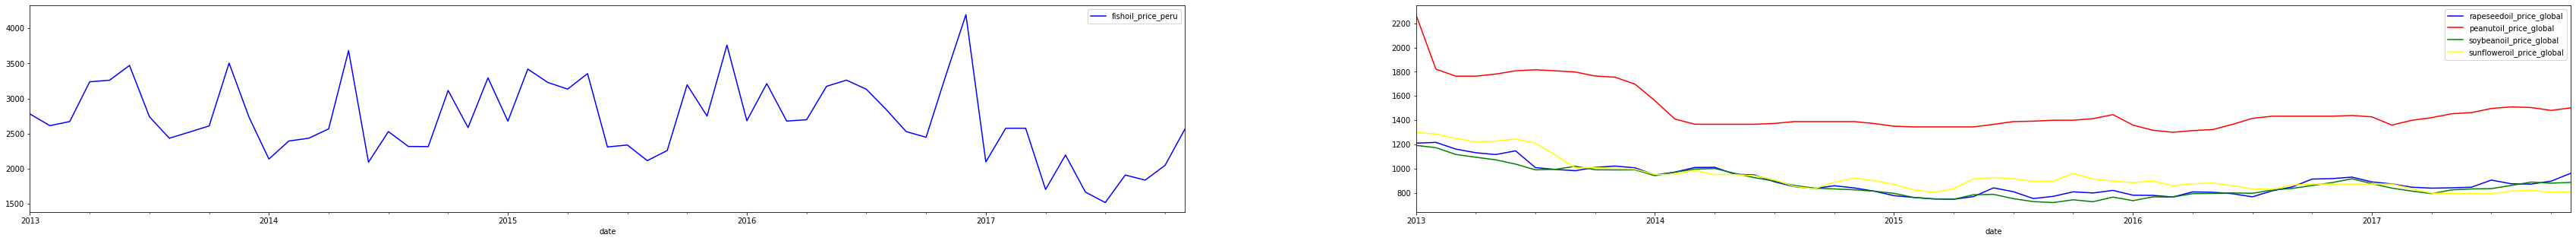

In [7]:
# plot all data
fig, axs = plt.subplots(1, 2, figsize=(60, 5))

# only show data in certain interval
date_start = "2012-12-01"
date_end = "2017-12-01"
df_filtered = df[(df.index > date_start) & (df.index < date_end)]

df_filtered.plot(kind='line', y='fishoil_price_peru', color='blue', ax=axs[0])
# df_processed_filtered.plot(kind='line', y='fish_price_global', color='red', ax=axs[0])
# df_processed_filtered.plot(kind='line', y='fishmeal_price_peru', color='green', ax=axs[0])

df_filtered.plot(kind='line', y='rapeseedoil_price_global', color='blue', ax=axs[1])
df_filtered.plot(kind='line', y='peanutoil_price_global', color='red', ax=axs[1])
df_filtered.plot(kind='line', y='soybeanoil_price_global', color='green', ax=axs[1])
df_filtered.plot(kind='line', y='sunfloweroil_price_global', color='yellow', ax=axs[1])

plt.show()

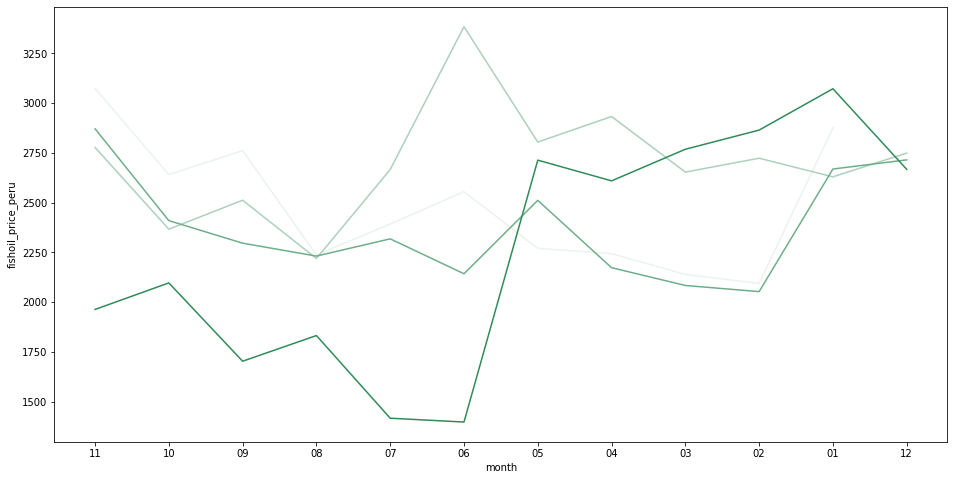

In [8]:
# peru fish oil price overlapped
fig, ax = plt.subplots(figsize = (16, 8))

# only show data in certain interval
date_start = "2017-12-01"
date_end = "2021-12-01"
years = int(datetime.datetime.strptime(date_end, '%Y-%m-%d').strftime('%Y')) - int(datetime.datetime.strptime(date_start, '%Y-%m-%d').strftime('%Y'))
feature = 'fishoil_price_peru'
df_filtered = df[(df.index > date_start) & (df.index < date_end)].copy()
# df_processed_filtered[feature].groupby(df_processed_filtered.index.strftime('%y')).plot()
df_filtered['year'] = df_filtered.index.strftime('%y')
df_filtered['month'] = df_filtered.index.strftime('%m')

palette = sns.light_palette('seagreen', n_colors = years)
sns.lineplot(ax = ax,
             data = df_filtered,
             x = 'month',
             y = feature,
             hue = 'year',
             palette = palette,
             ci = None)
ax.get_legend().remove()

The goal of the following plots are to spot data-sets that are drivers of the price in both the short- and long-term.<br>
The drivers are plotted in the first plot together with the price, over a two-year period.<br>
The second plot contains only the price.<br>

The graph shows that the total amount of fish oil export in Peru in metric ton is very correlated to the FOB export value of fish oil in Peru.
Moreover, we can see that the fish oil export in Peru in metric ton is negatively correlated with the fish oil price in Peru meaning that when the amount of fish oil that is exported increases, the price decreases. It can also be seen that the prices of fish meal in Hamburg are extremely stable compared to the fish oil prices in Peru, thus they do not seem to be correlated.

In [9]:
# plot two years of input features to predict one year of output
def plot_features(date_start, features):
    # compute dates
    date_middle = str(int(datetime.datetime.strptime(date_start, '%Y-%m-%d').strftime('%Y')) + 2) + '-' + datetime.datetime.strptime(date_start, '%Y-%m-%d').strftime('%m-%d')
    date_end = str(int(datetime.datetime.strptime(date_start, '%Y-%m-%d').strftime('%Y')) + 3) + '-' + datetime.datetime.strptime(date_start, '%Y-%m-%d').strftime('%m-%d')

    # filter data
    df_processed_filtered_drivers = df_processed[(df_processed.index > date_start) & (df_processed.index <= date_middle)]
    df_processed_filtered_drivers = df_processed_filtered_drivers[features]
    df_processed_filtered_output = df_processed[(df_processed.index >= date_middle) & (df_processed.index < date_end)]
    df_processed_filtered_output = df_processed_filtered_output[features]

    # plot all data
    fig, axs = plt.subplots(figsize=(30, 5))

    palette = sns.color_palette("hls", len(features))
    for (feature, color) in zip(features, palette):
        df_processed_filtered_drivers.plot(kind='line', y=feature, color=color, ax=axs)

    df_processed_filtered_output.plot(kind='line', y=features[0], color=palette[0], ax=axs)

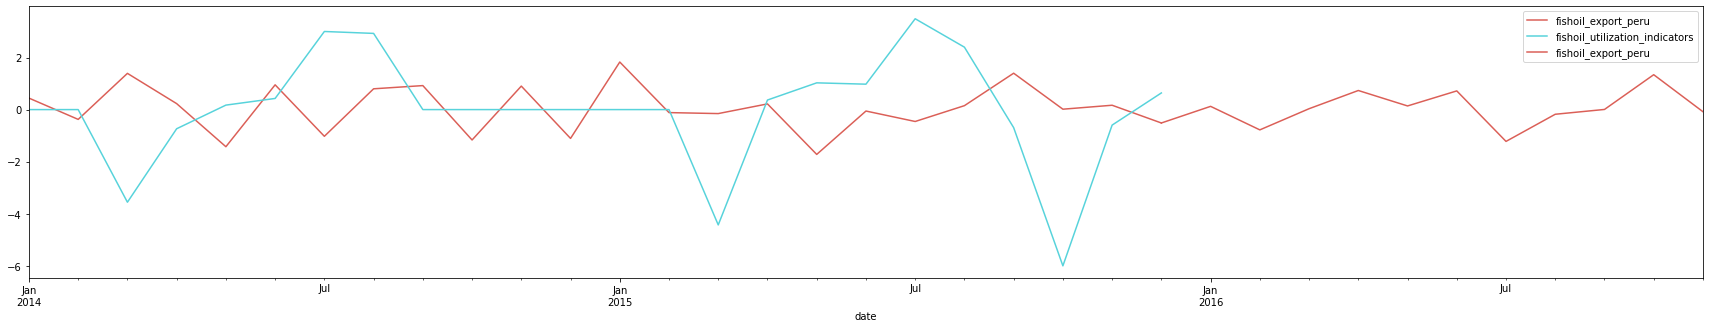

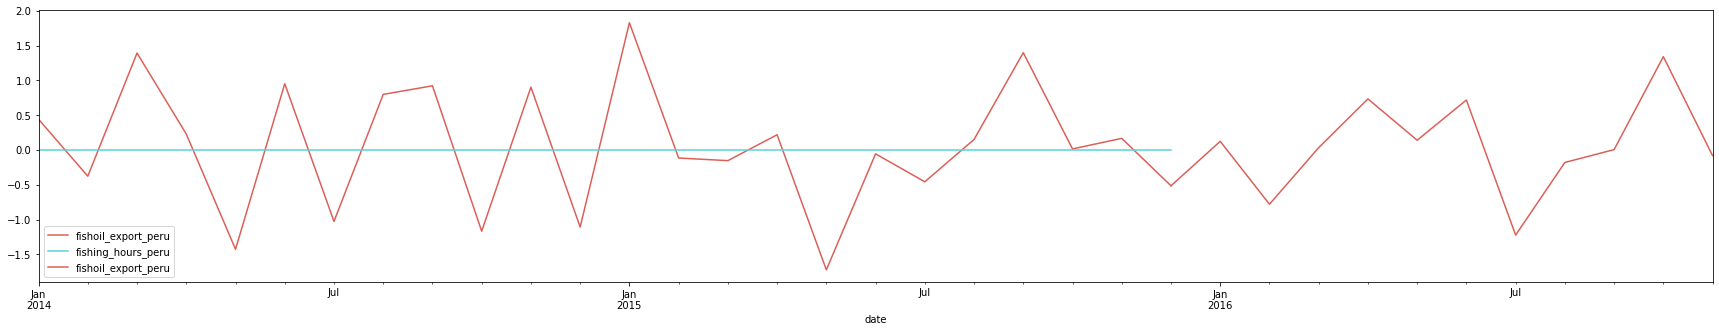

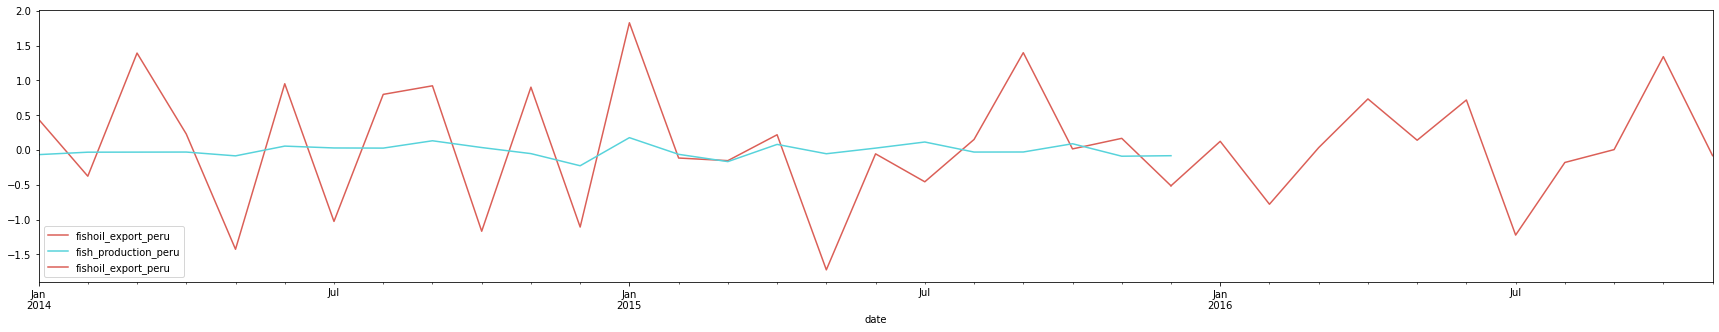

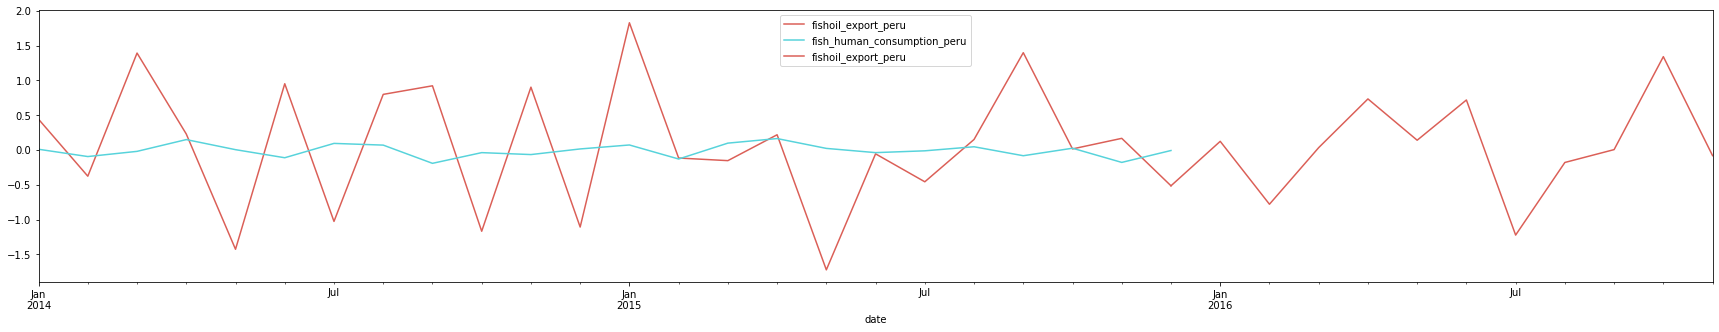

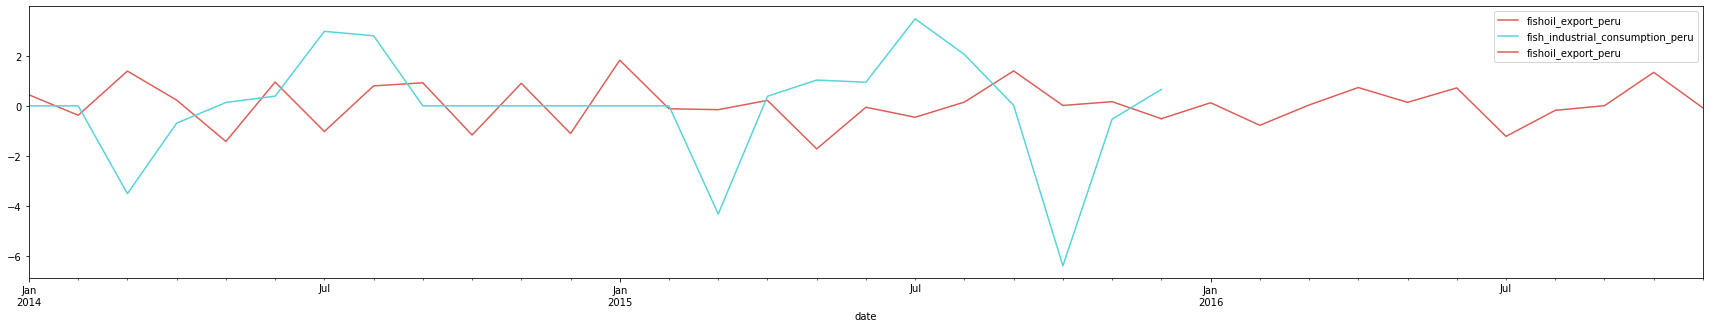

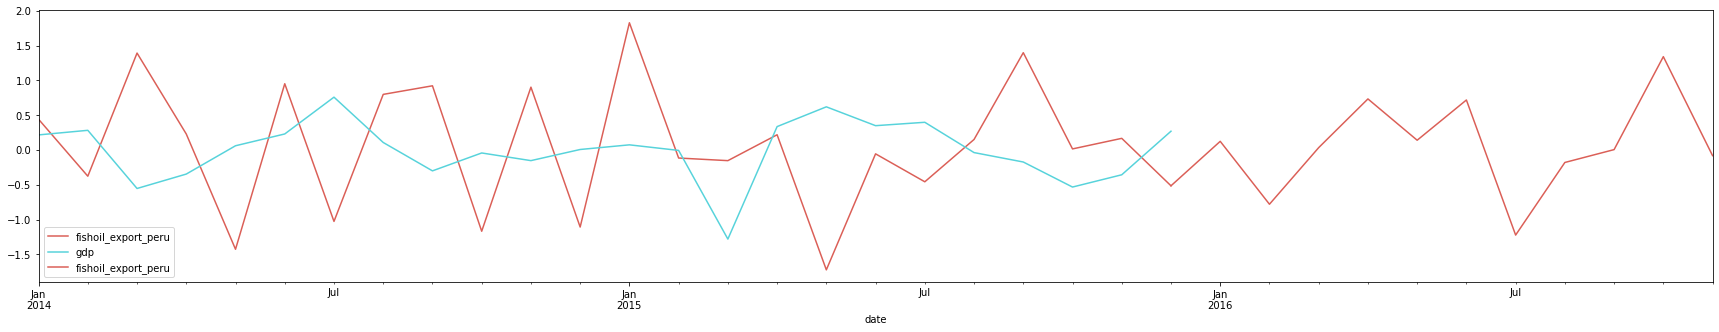

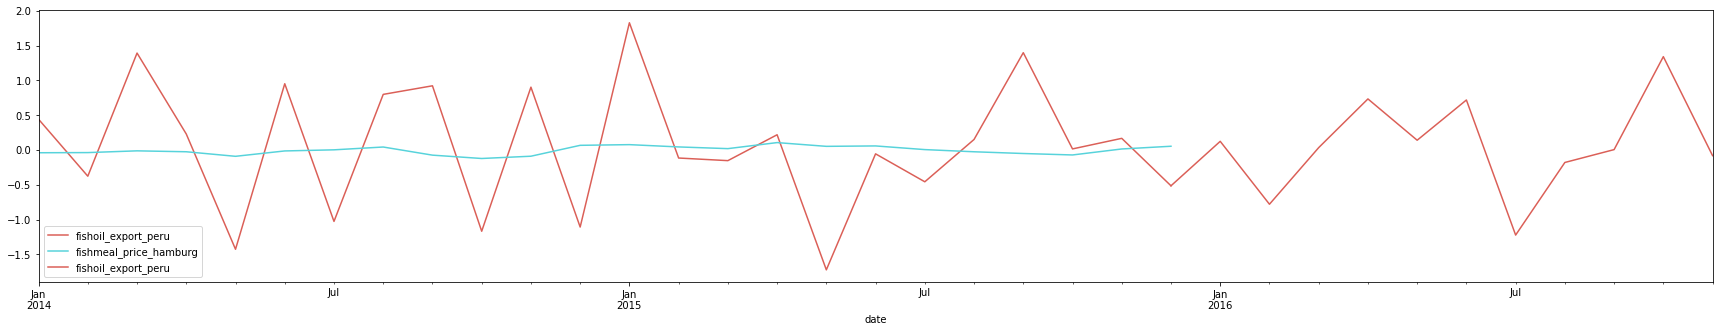

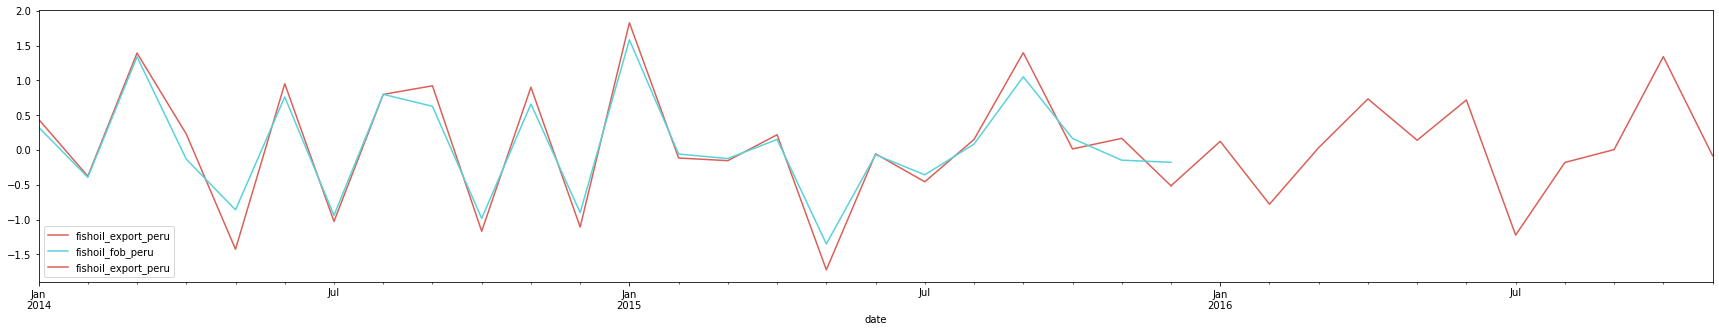

In [10]:
features = ['fishoil_utilization_indicators', 'fishing_hours_peru', 'fish_production_peru', 'fish_human_consumption_peru', 'fish_industrial_consumption_peru', 'gdp', 'fishmeal_price_hamburg', 'fishoil_fob_peru']
date_start = "2013-12-01"

for feature in features:
    plot_features(date_start, ['fishoil_export_peru', feature])